# 국내 2000년 ~ 2020년 까지의 종단적인 연구를 통해 사회적 차원의 사고요인 분석
- 고속도로 내 사고건수 및 사망자수 변화
    - 고속도로 내 사고건수 및 사망자수 둘 다 점차 감소 중임
- 고속도로 내 사상자 대비 사망자수 변화
    - 사상자 대비 사망자율의 변화는 유의미한 변화를 찾기 어렵고 들쑥 날쑥함. -> 사망자 데이터가 300명 내외이므로 데이터가 적은 문제
- 국내 차량 등록대수 변화
    - 꾸준히 증가하고 있으며 20년간 약 1,200만대 가량 증가
=== 위의 데이터는 따로 분석을 진행하지 않았고, 전국 사고 데이터를 가지고 분석을 진행함.

1. 대한민국 20년간 사고, 사상자 변화
    - 대한민국의 2000년 ~ 2020년 사고건수, 사망자, 부상자, 사고건수 변화 추이
    - 사망자, 사망자율은 감소하나,
    - 사고 건수는 2004년 경 이후로 유의미한 감소가 없음

2. 대한민국에서 발생하는 교통위반 건수와 사망자수의 상관관계(2014년~2018년)
    - 사망자수는 과속과는 -0.8, 전체 교통위반 건수와는 -0.66의 상관계수를 가지고,
        - 과속단속이 증가할 수록 사망자수는 감소함, 전체 교통위반이 증가할수록 사망자수는 감소,
    - 사망자수는 음주운전과 0.97의 양의 상관관계를 가짐.

3. 법규위반별 사망율(2005년 ~ 2020년)
    - 각 법규위반에 의해 야기된 사고들 중 사망율이 높은 피쳐 탐색
    - 전체 사망율 자체가 감소하고 있음.
    - 과속이 가장 높음

4. 법규위반별 사고 건수(2005년 ~ 2020년)
    - 전부 완만하고, x축과 평행에 가까워 증가 또는 감소세가 보이지 않으나,
    - 과속은 약 3배가량 증가함


In [1]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('한국도로공사_교통사고통계_20201231.csv', encoding='cp949')
# 이 데이터는 전체 사고가 아닌 고속도로 통계이므로 다시 찾을 필요가 있음

FileNotFoundError: [Errno 2] No such file or directory: '한국도로공사_교통사고통계_20201231.csv'

In [ ]:
df_accident = df.set_index('연도')

In [ ]:
df_accident

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
plt.figure(figsize=(12, 8))
df_accident.plot(kind='bar', y=['사망', '부상'], stacked=True, color = ['r' , 'b'])
plt.ylabel('사고 건수')
plt.title('2000~2020사고 건수 변화(고속도로)')
plt.show()

- 사고 대비 사망율
- OCED 국가들과 비교

### 사고 대비 사망율

In [ ]:
df_accident['사망율'] = df_accident['사망']/(df_accident['사망']+df_accident['부상']) * 100

In [ ]:
df_accident

In [ ]:
plt.figure(figsize=(12, 8))
df_accident['사망율'].plot(lw=3, color = 'red')
plt.title('고속도로 내 사상자 대비 사망자 발생율(2000~2020)', size=15)
plt.ylabel(ylabel='사망율')
plt.xticks(ticks=[2000, 2005, 2010, 2015, 2020])
plt.show()

In [ ]:
df_02 = pd.read_excel('자동차 등록대수_20220801.xlsx')

In [ ]:
df_02

In [ ]:
# 매년 말 기준 12월 컬럼만 남기고 나머지 삭제
df_car_registered = df_02[df_02['Unnamed: 1'] == '12월'][['Unnamed: 0', 'Unnamed: 5']]

In [ ]:
df_car_registered.rename(columns={'Unnamed: 5': '차량 등록대수', 'Unnamed: 0': '연도'}, inplace=True)

In [ ]:
# 연도에서 '년'을 빼서  int로 형 변환
df_car_registered['연도'] = df_car_registered['연도'].str[:-1]

In [ ]:
# NaN값 제거
df_car_registered = df_car_registered.dropna()

In [ ]:
df_car_registered['연도'] = df_car_registered['연도'].astype('int')

In [ ]:
df_car_registered = df_car_registered[df_car_registered['연도']>=2000]

In [ ]:
df_car_registered['차량 등록대수'] = df_car_registered['차량 등록대수'].astype('int')

In [ ]:
plt.figure()
df_car_registered.set_index('연도').sort_index(ascending=False).plot(kind = 'barh')
plt.xlabel('차량 등록 대수')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
df_car = df_car_registered.set_index('연도').sort_index(ascending=False)
sns.barplot(x=df_car.index, y='차량 등록대수', data=df_car)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_kind = pd.read_csv('도로교통공단_사고유형별 교통사고 통계_20211231.csv', encoding='cp949')

In [ ]:
df_kind

# 대한민국에서 발생한 전체 교통사고 데이터

## 데이터 전처리
- 도로형태별 교통사고 현황을 각각 데이터 프레임으로 불러와, 사고건수, 사망자수, 부상자수만 가지고 concat하여 하나의 데이터 프레임으로 만듬

In [9]:
df001 = pd.read_excel('도로형태별_교통사고(2000년~2004년).xls', header=None)

In [10]:
df001 = df001.loc[1:5, 2:].T

In [11]:
df001.columns = df001.loc[2]

In [12]:
df001.drop(np.nan, axis=1, inplace=True)
df001.set_index('기준년도', inplace=True)

- 안전장치,
- 차종에 따른 변화

In [13]:
df001.drop('기준년도', axis=0, inplace=True)

In [14]:
print(df001)

2           사고건수     사망자수      부상자수
기준년도                               
2000.0  290481.0  10236.0  426984.0
2001.0  260579.0   8097.0  386539.0
2002.0  231026.0   7222.0  348149.0
2003.0  240832.0   7212.0  376503.0
2004.0  220755.0   6563.0  346987.0


In [15]:
df002 = pd.read_excel('도로형태별_교통사고(2005년~2014년).xls', header=2)
df002 = df002.loc[:2, '기준년도':]
df002 = df002.transpose()
df002.columns = df002.iloc[0]
df002.drop('기준년도', axis=0, inplace=True)

In [16]:
df003 = pd.read_excel('도로형태별_교통사고(2015년~2020년).xls', header=2)
df003 = df003.loc[:2, '기준년도':]
df003 = df003.transpose()
df003.columns = df003.iloc[0]
df003.drop('기준년도', axis=0, inplace=True)

In [17]:
df003

기준년도,사고건수,사망자수,부상자수
2015,232035,4621,350400
2016,220917,4292,331720
2017,216335,4185,322829
2018,217148,3781,323037
2019,229600,3349,341712
2020,209654,3081,306194


In [18]:
df002

기준년도,사고건수,사망자수,부상자수
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656.0,5392.0,344565.0
2013,215354.0,5092.0,328711.0
2014,223552.0,4762.0,337497.0


In [19]:
df_result = pd.concat([df001, df002, df003])

In [20]:
df_result

,사고건수,사망자수,부상자수
2000.0,290481.0,10236.0,426984.0
2001.0,260579.0,8097.0,386539.0
2002.0,231026.0,7222.0,348149.0
2003.0,240832.0,7212.0,376503.0
2004.0,220755.0,6563.0,346987.0
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875


In [21]:
for col_name in df_result.columns:
    df_result[col_name] = df_result[col_name].astype('int')

In [22]:
df_result.index = df_result.index.astype('int')

In [23]:
df_result['사망자율'] = df_result['사망자수'] / (df_result['사망자수']+df_result['부상자수']) * 100

In [24]:
df_result

,사고건수,사망자수,부상자수,사망자율
2000,290481,10236,426984,2.341155
2001,260579,8097,386539,2.051764
2002,231026,7222,348149,2.032242
2003,240832,7212,376503,1.879520
2004,220755,6563,346987,1.856315
2005,214171,6376,342233,1.828983
2006,213745,6327,340229,1.825679
2007,211662,6166,335906,1.802544
2008,215822,5870,338962,1.702278
2009,231990,5838,361875,1.587651


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'

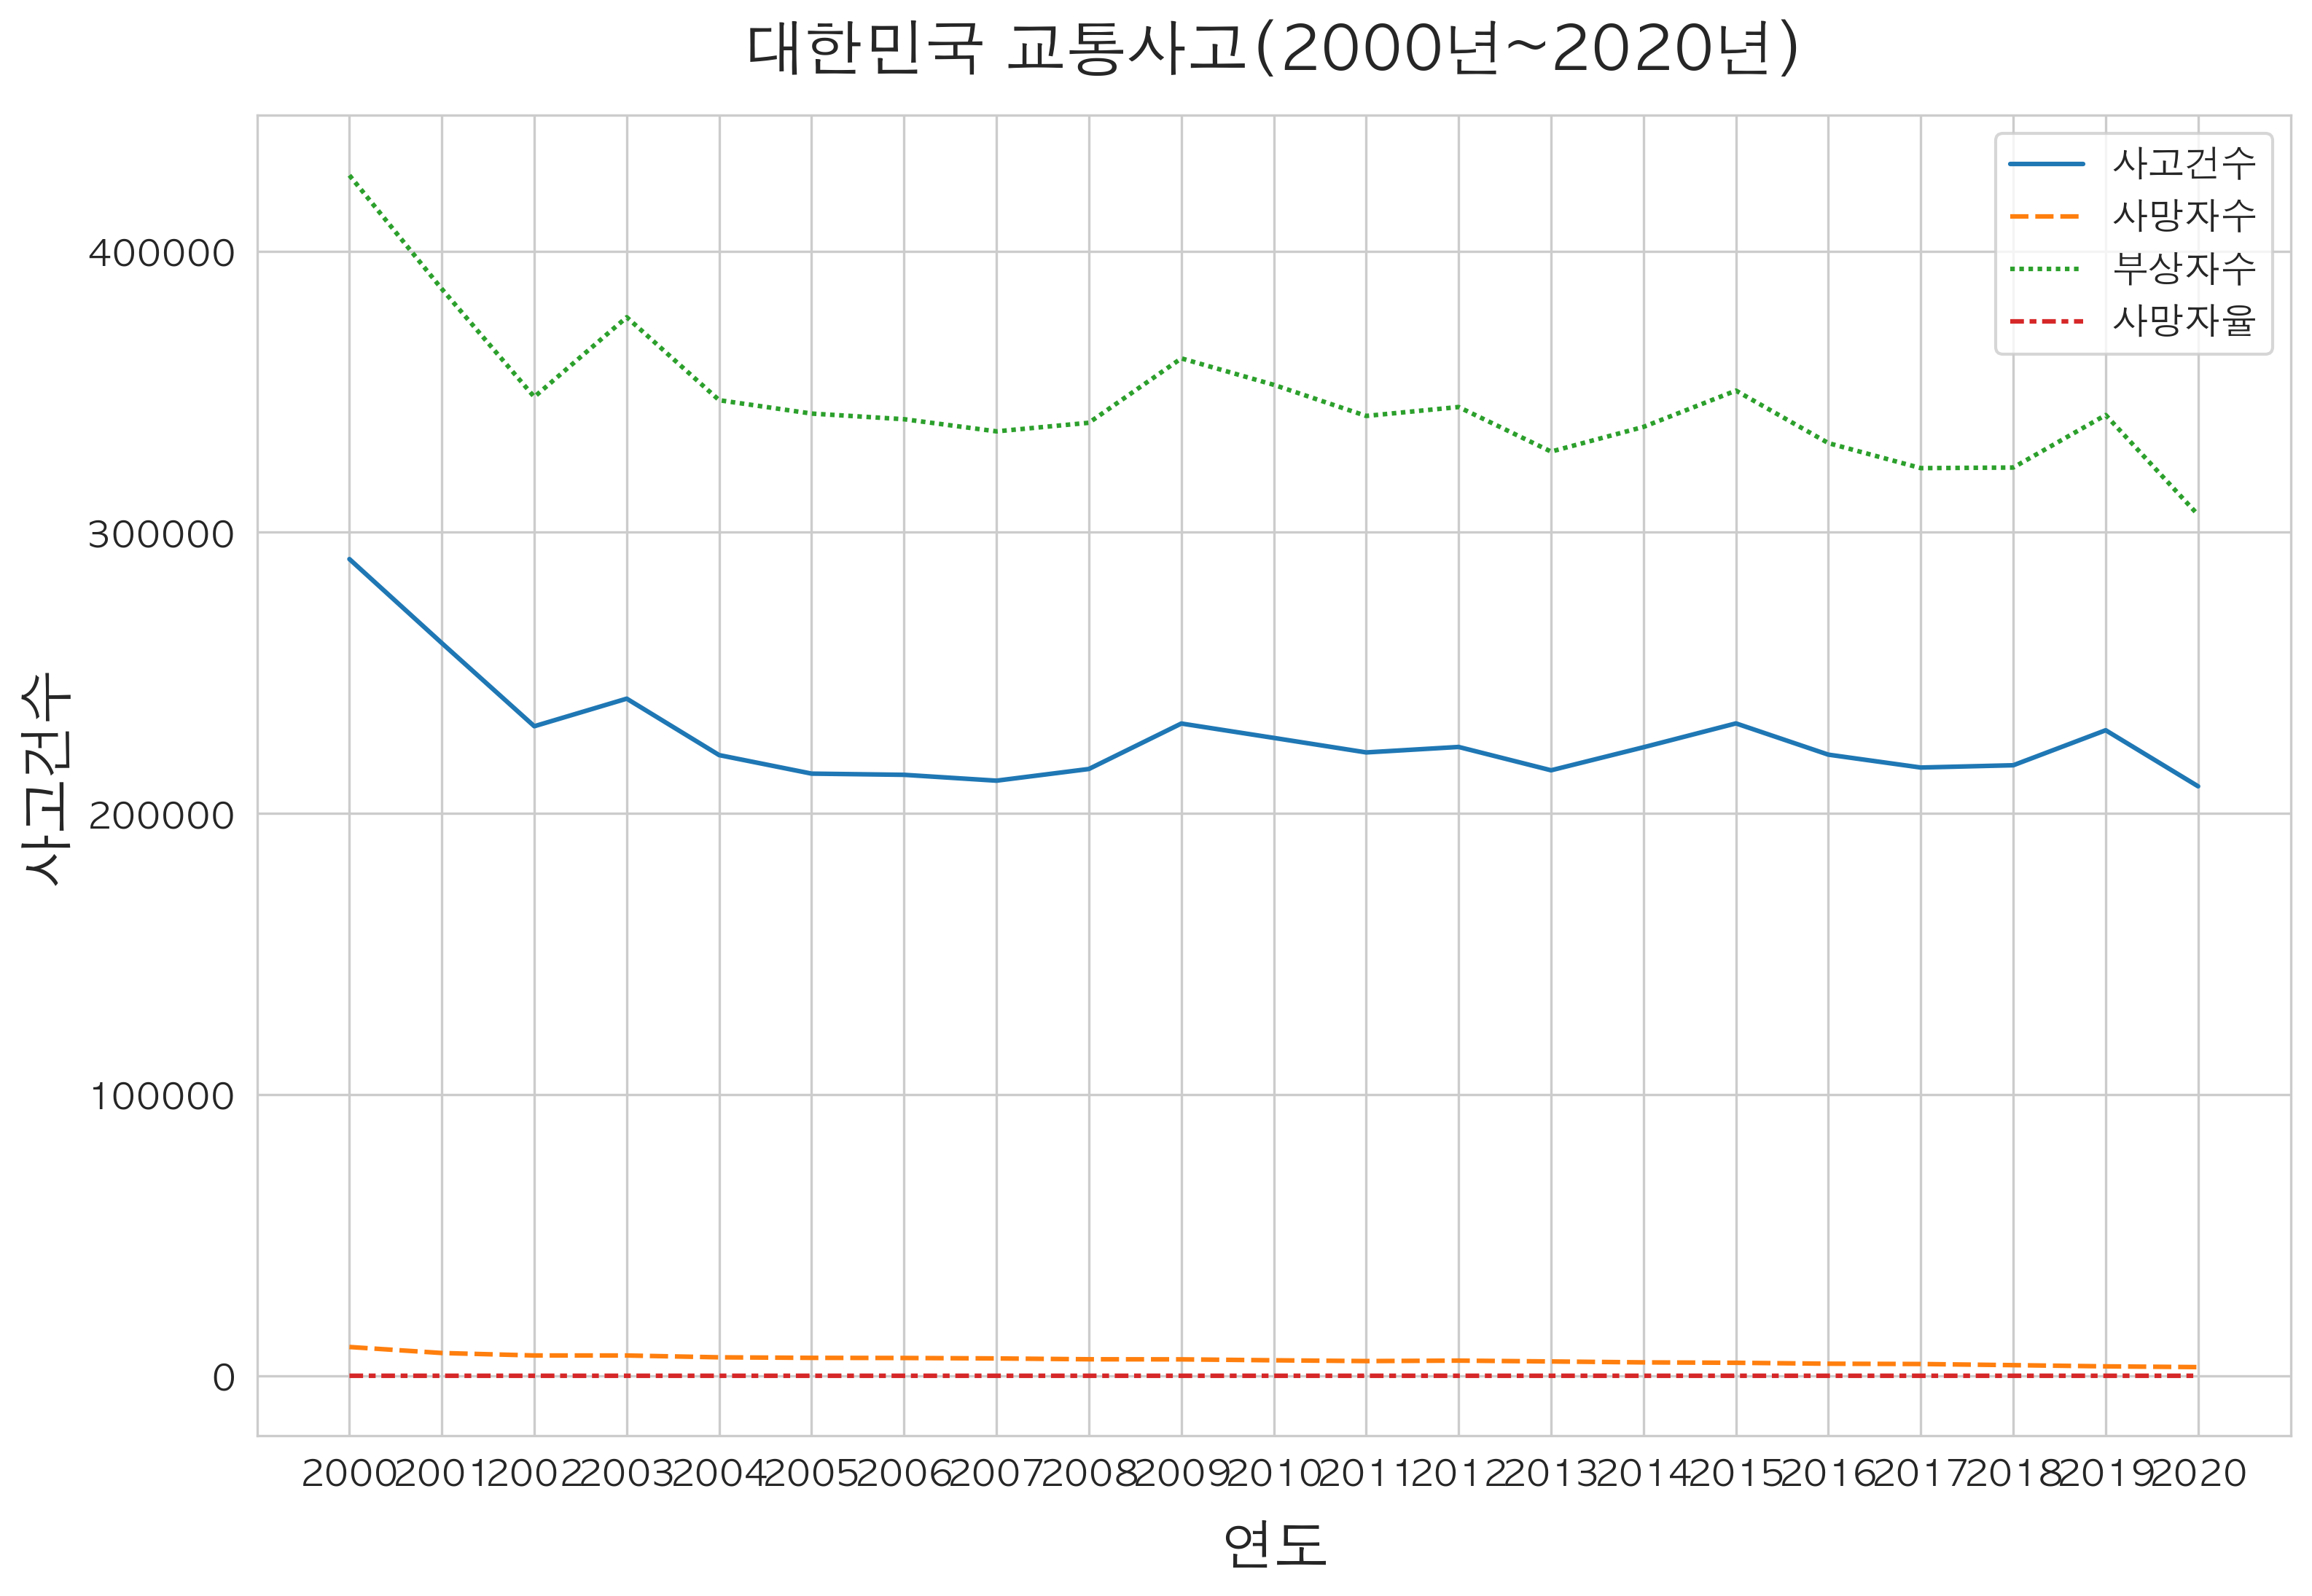

In [26]:
plt.figure(figsize=(12, 8), dpi=300)
sns.lineplot(data=df_result)
plt.title('대한민국 교통사고(2000년~2020년)', fontsize=20, pad=15)
plt.xlabel('연도', fontsize=18, labelpad=10)
plt.ylabel('사고건수', fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(np.arange(2000, 2021, 1), fontsize=12)
plt.legend(prop={'size': 12})
# for col in range(1, len(df_result.columns)):
#     plt.text(2005, df_result.iloc[0, col]-0.5, df_result.columns[col], horizontalalignment='right')
# 2004년과 2020년 값 찍어보기

plt.show()

## 분석결과
- 우리나라의 사고건수, 부상자수, 사망자수 모두 점차적으로 감소하고 있으나, 2003년 이후 사고건수 및 부상자소는 유의미한 감소가 보여지지 않는다.

- 다른 나라의 사망자수, 사고건수

## 교통위반 건수 데이터 분석
출처 : [공공데이터포털](https://www.data.go.kr/data/3051800/fileData.do)
기준이 명확하지 않아 위반 건수인지 확인해야 함

In [28]:
import matplotlib as mpl
mpl.rc('axes', unicode_minus=False)
import warnings
warnings.filterwarnings(action='ignore')

In [29]:
df_fine = pd.read_csv('fine/경찰청_교통단속현황_20190618.csv', encoding='cp949', dtype='int32')

In [30]:
df_fine['교통위반건수'] = df_fine['음주']+df_fine['무면허']+df_fine['신호']+df_fine['중침']+df_fine['과속']+df_fine['안전운전']+df_fine['기타']+df_fine['보행자(무단횡단)']

In [31]:
df_fine

,구분,음주,무면허,신호,중침,과속,안전운전,기타,보행자(무단횡단),교통위반건수
0,2014,251788,57225,2162900,105402,8446553,96671,2752362,137051,14009952
1,2015,243100,66164,2243753,144795,8474229,107989,3571099,378201,15229330
2,2016,226599,82638,2176603,158592,8093957,112511,4083388,550387,15484675
3,2017,205187,61991,2163848,132759,11839954,101521,2953767,334912,17793939
4,2018,163060,45352,1952583,91908,12154255,102649,1534744,112130,16156681


In [32]:
df_fine_sum = df_fine[['구분', '교통위반건수']]

In [33]:
df_fine_sum

,구분,교통위반건수
0,2014,14009952
1,2015,15229330
2,2016,15484675
3,2017,17793939
4,2018,16156681


In [34]:
df_result

,사고건수,사망자수,부상자수,사망자율
2000,290481,10236,426984,2.341155
2001,260579,8097,386539,2.051764
2002,231026,7222,348149,2.032242
2003,240832,7212,376503,1.879520
2004,220755,6563,346987,1.856315
2005,214171,6376,342233,1.828983
2006,213745,6327,340229,1.825679
2007,211662,6166,335906,1.802544
2008,215822,5870,338962,1.702278
2009,231990,5838,361875,1.587651


In [35]:
df_result_fine = df_result.reset_index()

In [36]:
df_result_fine.rename(columns={'index': '구분'}, inplace=True)
df_result_fine.구분 = df_result_fine.구분.astype('int')

In [37]:
df_result_fine01 = df_result_fine.merge(df_fine_sum, on='구분')

In [38]:
# 사망자수를 전부 정수형으로 전환
df_result_fine01['사망자수'] = df_result_fine01['사망자수'].astype('int')

# 사망자수와 교통위반의 상관관계 구하기
np.corrcoef(df_result_fine01['사망자수'], df_result_fine01['교통위반건수'])

# 교통위반 건수와는 오히려 음의 상관관계를 보인다?, 표본이 너무 적어 추가 자료가 필요함.

array([[ 1.        , -0.65953298],
       [-0.65953298,  1.        ]])

In [39]:
df_result_fine02 = df_result_fine.copy()
df_fine_kind = df_fine.copy()

In [40]:
df_result_fine02

,구분,사고건수,사망자수,부상자수,사망자율
0,2000,290481,10236,426984,2.341155
1,2001,260579,8097,386539,2.051764
2,2002,231026,7222,348149,2.032242
3,2003,240832,7212,376503,1.879520
4,2004,220755,6563,346987,1.856315
5,2005,214171,6376,342233,1.828983
6,2006,213745,6327,340229,1.825679
7,2007,211662,6166,335906,1.802544
8,2008,215822,5870,338962,1.702278
9,2009,231990,5838,361875,1.587651


In [41]:
df_fine_kind

,구분,음주,무면허,신호,중침,과속,안전운전,기타,보행자(무단횡단),교통위반건수
0,2014,251788,57225,2162900,105402,8446553,96671,2752362,137051,14009952
1,2015,243100,66164,2243753,144795,8474229,107989,3571099,378201,15229330
2,2016,226599,82638,2176603,158592,8093957,112511,4083388,550387,15484675
3,2017,205187,61991,2163848,132759,11839954,101521,2953767,334912,17793939
4,2018,163060,45352,1952583,91908,12154255,102649,1534744,112130,16156681


In [42]:
df_result_fine02 = df_result_fine02.merge(df_fine_kind, on='구분')

In [43]:
df_result_fine02

,구분,사고건수,사망자수,부상자수,사망자율,음주,무면허,신호,중침,과속,안전운전,기타,보행자(무단횡단),교통위반건수
0,2014,223552,4762,337497,1.391344,251788,57225,2162900,105402,8446553,96671,2752362,137051,14009952
1,2015,232035,4621,350400,1.301613,243100,66164,2243753,144795,8474229,107989,3571099,378201,15229330
2,2016,220917,4292,331720,1.277335,226599,82638,2176603,158592,8093957,112511,4083388,550387,15484675
3,2017,216335,4185,322829,1.279762,205187,61991,2163848,132759,11839954,101521,2953767,334912,17793939
4,2018,217148,3781,323037,1.156913,163060,45352,1952583,91908,12154255,102649,1534744,112130,16156681


In [44]:
df_result_fine02.rename(columns={'음주':'음주운전',
                                 '무면허': '무면허운전',
                                 '신호': '신호위반',
                                 '중침': '중앙선침범',
                                 '안전운전': '안전운전의무위반'}, inplace=True)

In [45]:
# 상관관계 분석 위해 데이터 형 변환
df_result_fine02.astype('float').corr()['사망자수']

구분          -0.982953
사고건수         0.729509
사망자수         1.000000
부상자수         0.790300
사망자율         0.945737
음주운전         0.979692
무면허운전        0.357712
신호위반         0.814494
중앙선침범        0.307124
과속          -0.803074
안전운전의무위반    -0.129810
기타           0.558022
보행자(무단횡단)    0.146183
교통위반건수      -0.659533
Name: 사망자수, dtype: float64

In [46]:
# 시각화를 위해 Series를 DataFrame으로 변환
df_fine_visual = pd.DataFrame(df_result_fine02.astype('float').corr()['사망자수']).drop(['구분', '사망자수', '부상자수', '사망자율'], axis=0).sort_values(by='사망자수')

# 기타 컬럼을 기타 법규위반으로 변경
df_fine_visual.rename(columns={'기타': '기타 법규위반'})

,사망자수
과속,-0.803074
교통위반건수,-0.659533
안전운전의무위반,-0.129810
보행자(무단횡단),0.146183
중앙선침범,0.307124
무면허운전,0.357712
기타,0.558022
사고건수,0.729509
신호위반,0.814494
음주운전,0.979692


In [47]:
# df_fine_visual.drop('교통위반', inplace=True)

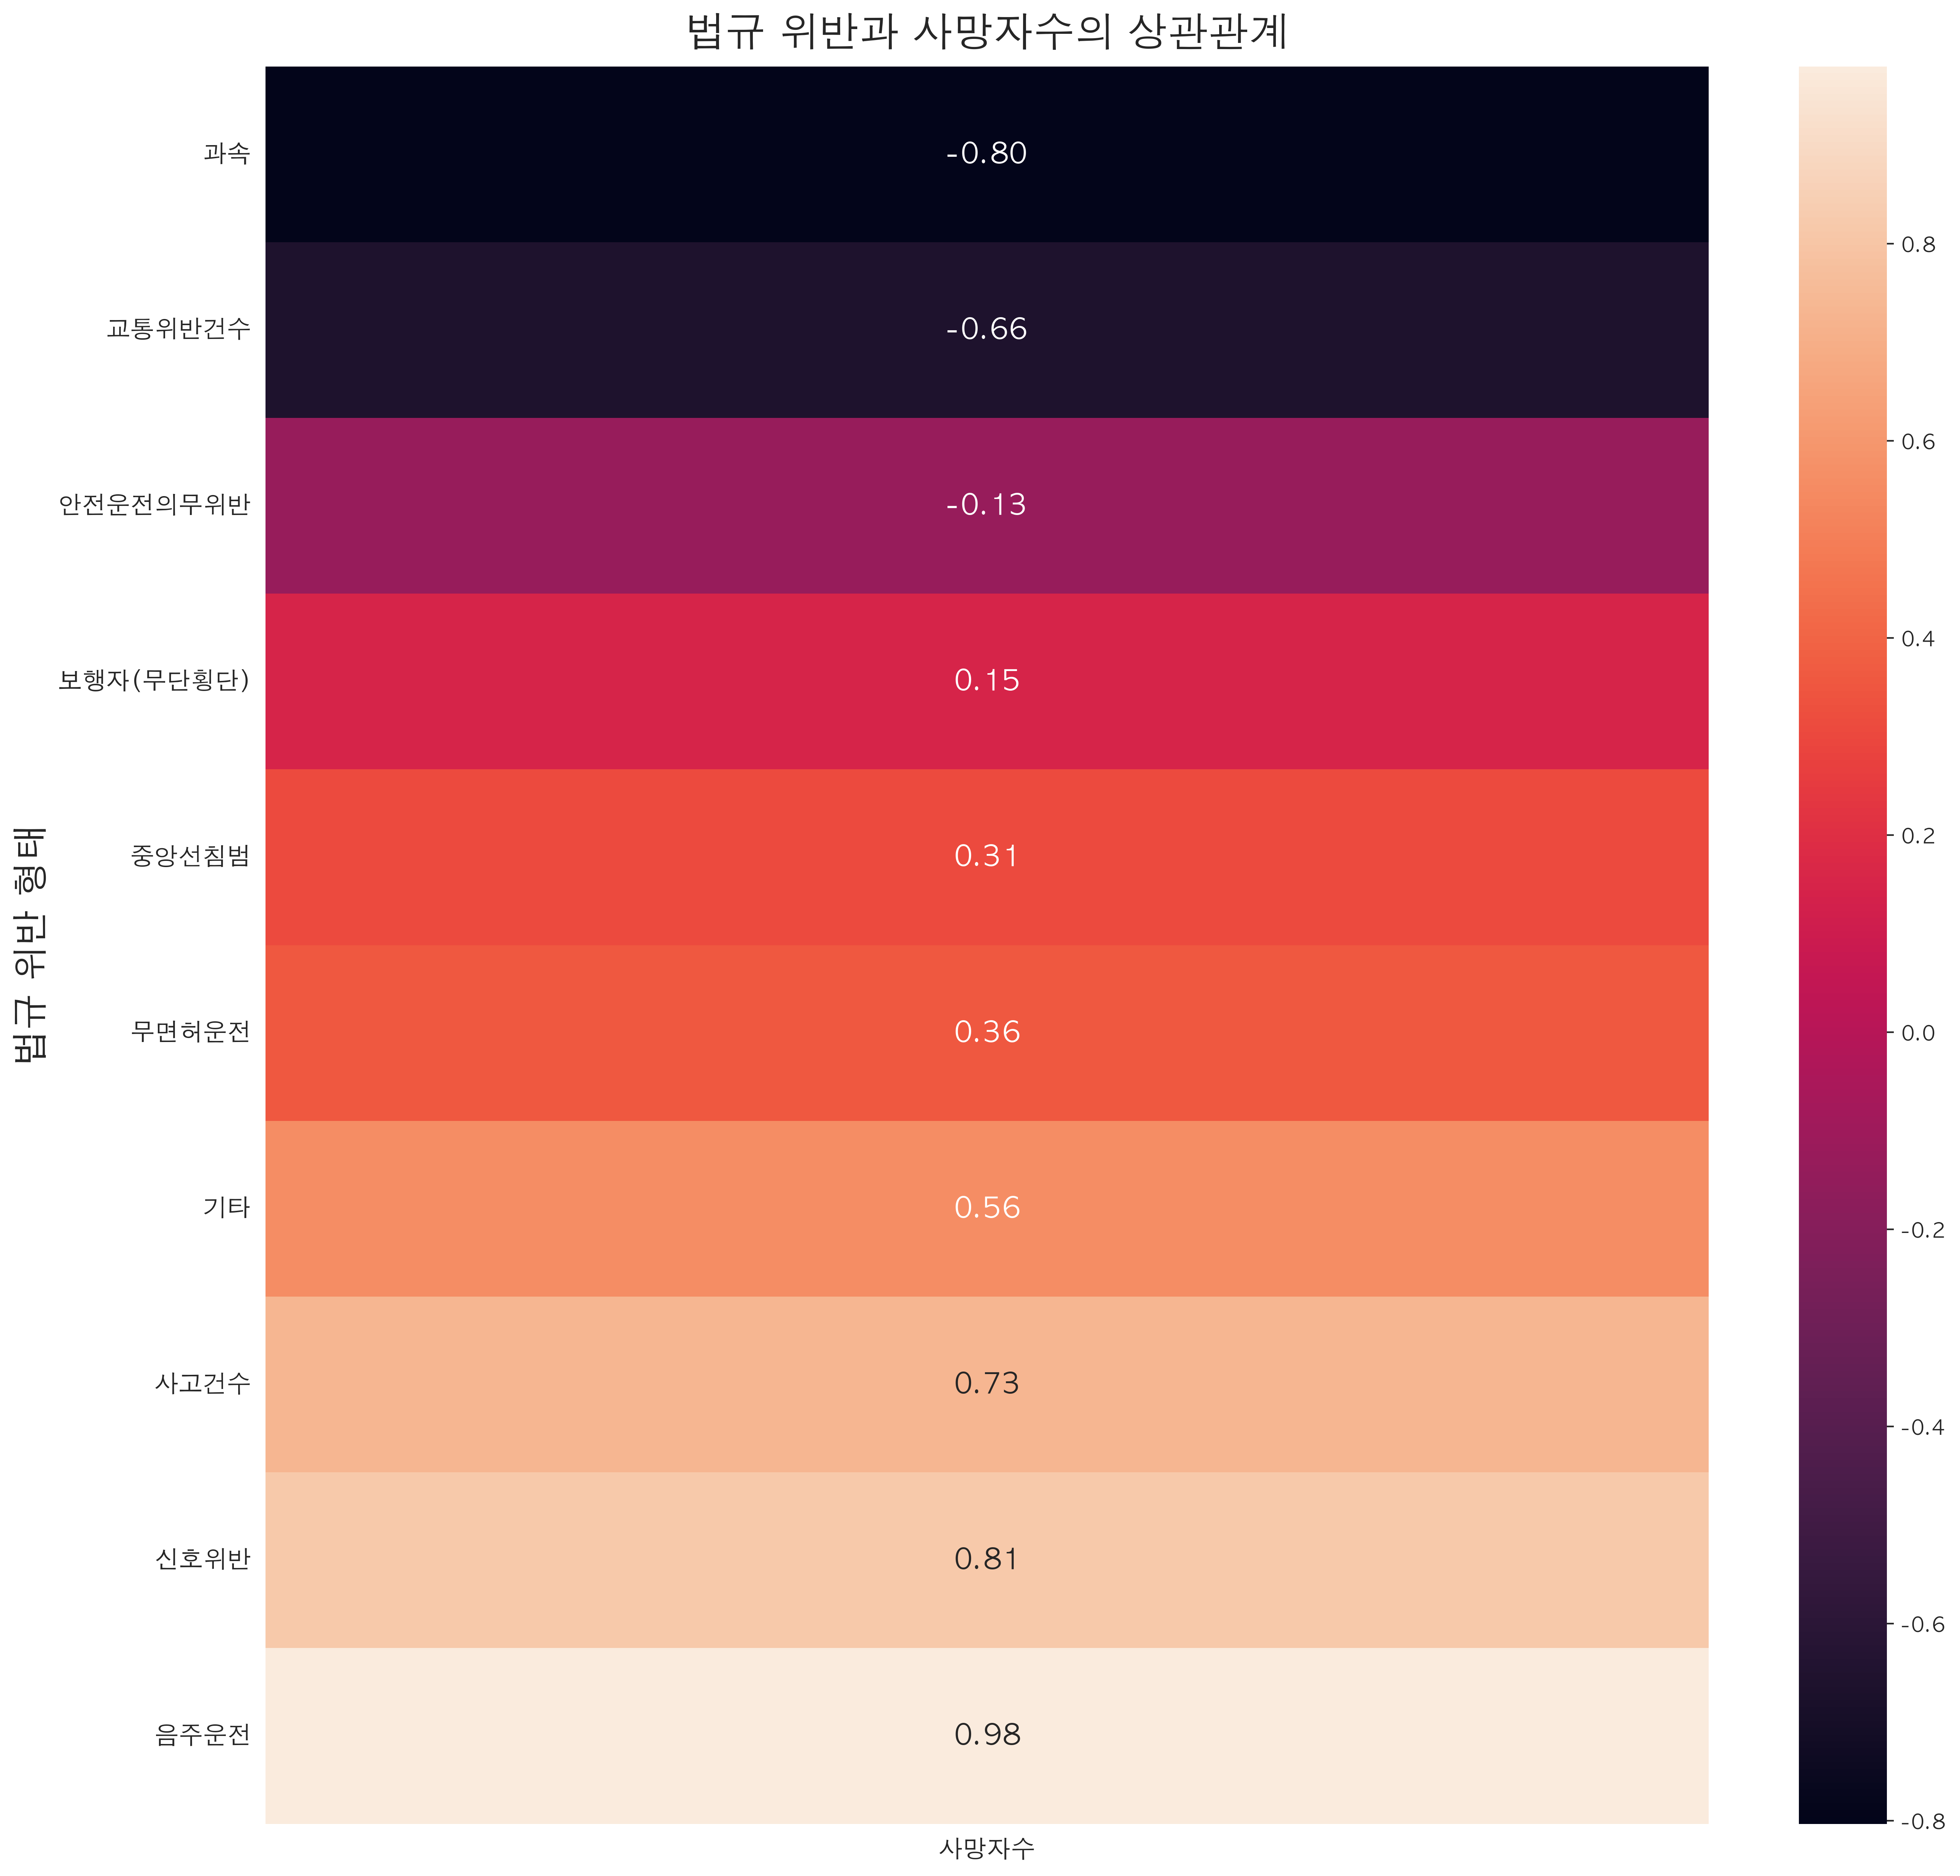

In [73]:
# 히트맵 시각화
plt.figure(figsize=(16,16), dpi=400)
sns.heatmap(data=df_fine_visual, fmt='.2f', annot=True, annot_kws={'size': 14})
plt.title('법규 위반과 사망자수의 상관관계', fontsize=20, pad=10)
plt.ylabel('법규 위반 형태', fontsize=18)
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12)
plt.savefig('법규 위반과 사망자수의 상관관계.jpg')
plt.show()

In [49]:
df_fine_visual

,사망자수
과속,-0.803074
교통위반건수,-0.659533
안전운전의무위반,-0.129810
보행자(무단횡단),0.146183
중앙선침범,0.307124
무면허운전,0.357712
기타,0.558022
사고건수,0.729509
신호위반,0.814494
음주운전,0.979692


## 분석결과
- 사망자수와 전체 교통위반 건수와는 오히려 음의 상관관계를 있으며,
- 음주운전과 신호위반과는 강한 양의 상관관계가 있다.
- 음주운전건수는 다른 영향에 의해 그냥 감소했을 가능성도 있다.
- 과속 건수가 많아진 것은 과속 단속 카메라 증가 및 제한속도 변경 등의 가능성
    - 과속 단속이 증가한 것이 사망자 감소의 원인이 될 수 있다.

# 법규위반별 교통사고 발생과 그에 따른 사망자 비교

## 데이터 전처리
1. 2005년부터 2020년까지의 법규위반별 사고건수(사망자수, 부상자수 포함) 데이터 셋을 읽어온다.
2. 각 데이터에 대해 사망자 비율을 구한다.
3. 사망자 비율을 구해 시각화 및 분석을 해볼 계획
    - 히트맵

__사망자 비율__ : 전체 사상자 대비 사망자의 비율 -> 사망자수 / (사망자수+부상자수) * 100
<br>
$사망자수 \over (사망자수+부상자수) * 100$

### 법규위반 용어 정리
- __중앙선 침범__ : 교통사고의 발생지점이 중앙선을 넘어선 모든 경우를 가리키는 것이 아니라, 부득이한 사유가 없이 중앙선을 침범하여 교통사고를 발생케 한 경우 [법률메카](https://www.lawmeca.com/19206-%EC%A4%91%EC%95%99%EC%84%A0-%EC%B9%A8%EB%B2%94%EC%9D%98%EC%9D%98%EB%AF%B8/)
- __안전운전의무 불이행__ : 모든 차의 운전자는 차의 조향장치와 제동장치, 그 밖의 장치를 정확하게 조작해야 하고, 도로의 교통상황과 차의 구조 및 성능에 따라 다른 사람에게 위험과 장해를 주는 속도나 방법으로 운전할 의무가 있는데 그 의무를 위반한 경우
    - 속도나 방법이 도로교통법상 위배됨 없이 운전하더라도, 그 운전행위가 객관적으로 교통상황과 차의 구조, 성능 등을 모두 고려해 볼 때 다른 사람에게 위험과 장해를 초래할 개연성이 높다면 안전운전의무를 지키지 않은 것으로 볼 수 있다.[도로교통공단](https://www.koroad.or.kr/kp_web/safeDriveObligation.do)
- __과속__ : 과속(過速)이란 자동차 주행을 허용 속도 이상의 속도로 주행한 경우
- __보행자보호의무위반__ : 보행자가 횡단보도를 통행하고 있을 때, 횡단보도 앞에서 일시정지 해야하고, 좁은 도로에서 보행자의 옆을 지나는 경우 안전한 거리를 두고 서행하여야할 의무를 위반한 경우
- __교차로운행방법위반__ : 교차로에서 좌회전중 사고(차로 침범, 좌회전 후 중앙선 침범 등), 우회전시 사고
- __안전거리미확보__ : 앞 차가 갑자기 정지하게 되는 경우 그 앞차와의 충돌을 피하기 위해 필요한 거리를 확보하여야 하는데, 그 안전거리를 확보하지 않은 경우
- __신호위반__ : 신호기 또는 교통정리를 하는 경찰공무원 등의 신호나 통행의 정지 또는 일시정지를 내용으로 하는 안전표지의 지시에 위반한 경우


[도로교통법](https://www.law.go.kr/%EB%B2%95%EB%A0%B9/%EB%8F%84%EB%A1%9C%EA%B5%90%ED%86%B5%EB%B2%95)

안전운전의무(도로교통법 제49조 제1항)
1. 물이 고인 곳을 운행할 때에는 고인 물을 튀게 하여 다른 사람에게 피해를 주는 일이 없도록 할 것
2. 다음 각 목의 어느 하나에 해당하는 경우에는 일시정지할 것
가. 어린이가 보호자 없이 도로를 횡단할 때, 어린이가 도로에서 앉아 있거나 서 있을 때 또는 어린이가 도로에서 놀이를 할 때 등 어린이에 대한 교통사고의 위험이 있는 것을 발견한 경우
나. 앞을 보지 못하는 사람이 흰색 지팡이를 가지거나 장애인보조견을 동반하는 등의 조치를 하고 도로를 횡단하고 있는 경우
다. 지하도나 육교 등 도로 횡단시설을 이용할 수 없는 지체장애인이나 노인 등이 도로를 횡단하고 있는 경우
3. 자동차의 앞면 창유리와 운전석 좌우 옆면 창유리의 가시광선(可視光線)의 투과율이 대통령령으로 정하는 기준보다 낮아 교통안전 등에 지장을 줄 수 있는 차를 운전하지 아니할 것. 다만, 요인(要人) 경호용, 구급용 및 장의용(葬儀用) 자동차는 제외한다.
4. 교통단속용 장비의 기능을 방해하는 장치를 한 차나 그 밖에 안전운전에 지장을 줄 수 있는 것으로서 행정안전부령으로 정하는 기준에 적합하지 아니한 장치를 한 차를 운전하지 아니할 것. 다만, 자율주행자동차의 신기술 개발을 위한 장치를 장착하는 경우에는 그러하지 아니하다.
5. 도로에서 자동차등(개인형 이동장치는 제외한다. 이하 이 조에서 같다) 또는 노면전차를 세워둔 채 시비ㆍ다툼 등의 행위를 하여 다른 차마의 통행을 방해하지 아니할 것
6. 운전자가 차 또는 노면전차를 떠나는 경우에는 교통사고를 방지하고 다른 사람이 함부로 운전하지 못하도록 필요한 조치를 할 것
7. 운전자는 안전을 확인하지 아니하고 차 또는 노면전차의 문을 열거나 내려서는 아니 되며, 동승자가 교통의 위험을 일으키지 아니하도록 필요한 조치를 할 것
8. 운전자는 정당한 사유 없이 다음 각 목의 어느 하나에 해당하는 행위를 하여 다른 사람에게 피해를 주는 소음을 발생시키지 아니할 것
가. 자동차등을 급히 출발시키거나 속도를 급격히 높이는 행위
나. 자동차등의 원동기 동력을 차의 바퀴에 전달시키지 아니하고 원동기의 회전수를 증가시키는 행위
다. 반복적이거나 연속적으로 경음기를 울리는 행위
9. 운전자는 승객이 차 안에서 안전운전에 현저히 장해가 될 정도로 춤을 추는 등 소란행위를 하도록 내버려두고 차를 운행하지 아니할 것
10. 운전자는 자동차등 또는 노면전차의 운전 중에는 휴대용 전화(자동차용 전화를 포함한다)를 사용하지 아니할 것. 다만, 다음 각 목의 어느 하나에 해당하는 경우에는 그러하지 아니하다.
가. 자동차등 또는 노면전차가 정지하고 있는 경우
나. 긴급자동차를 운전하는 경우
다. 각종 범죄 및 재해 신고 등 긴급한 필요가 있는 경우
라. 안전운전에 장애를 주지 아니하는 장치로서 대통령령으로 정하는 장치를 이용하는 경우
11. 자동차등 또는 노면전차의 운전 중에는 방송 등 영상물을 수신하거나 재생하는 장치(운전자가 휴대하는 것을 포함하며, 이하 “영상표시장치”라 한다)를 통하여 운전자가 운전 중 볼 수 있는 위치에 영상이 표시되지 아니하도록 할 것. 다만, 다음 각 목의 어느 하나에 해당하는 경우에는 그러하지 아니하다.
가. 자동차등 또는 노면전차가 정지하고 있는 경우
나. 자동차등 또는 노면전차에 장착하거나 거치하여 놓은 영상표시장치에 다음의 영상이 표시되는 경우
1) 지리안내 영상 또는 교통정보안내 영상
2) 국가비상사태ㆍ재난상황 등 긴급한 상황을 안내하는 영상
3) 운전을 할 때 자동차등 또는 노면전차의 좌우 또는 전후방을 볼 수 있도록 도움을 주는 영상
11의2. 자동차등 또는 노면전차의 운전 중에는 영상표시장치를 조작하지 아니할 것. 다만, 다음 각 목의 어느 하나에 해당하는 경우에는 그러하지 아니하다.
가. 자동차등과 노면전차가 정지하고 있는 경우
나. 노면전차 운전자가 운전에 필요한 영상표시장치를 조작하는 경우
12. 운전자는 자동차의 화물 적재함에 사람을 태우고 운행하지 아니할 것
13. 그 밖에 시ㆍ도경찰청장이 교통안전과 교통질서 유지에 필요하다고 인정하여 지정ㆍ공고한 사항에 따를 것

In [50]:
# 반복문 구동하기 2005~2020
for year in range(2005, 2021):
    # read_2006, read_2007, ... DataFrame 변수명 생성
    globals()['read_{}'.format(year)] = pd.read_excel('법규위반별 교통사고/{}년도 법규위반별 교통사고.xlsx'.format(year),
                                                      header=2, dtype='object',)
    globals()['read_{}'.format(year)]['사망자 비율'] = \
        globals()['read_{}'.format(year)]['사망자수(명)']/(globals()['read_{}'.format(year)]['사망자수(명)']+globals()['read_{}'.format(year)]['부상자수(명)']) * 100

In [51]:
df_dead_rate = pd.DataFrame()
df_dead_rate['법규위반'] = read_2005['법규위반']
# 위에서 생성한 모든 데이터 프레임에서 사망자 비율만 가져와 새로운 데이터프레임 생성
for year in range(2005, 2021):
    df_dead_rate['{}'.format(year)] = globals()['read_{}'.format(year)]['사망자 비율']

In [52]:
df_dead_visual = df_dead_rate.set_index('법규위반').transpose()

In [53]:
df_dead_visual

법규위반,계,중앙선침범,신호위반,안전거리미확보,과속,안전운전불이행,교차로운행방법위반,보행자보호의무위반,기타
2005,1.828983,2.64543,0.880447,0.205858,20.14652,2.365903,0.492401,3.106021,1.358113
2006,1.825679,2.506657,0.881259,0.240677,19.77887,2.413804,0.496672,3.504947,1.253346
2007,1.802544,2.441945,0.872366,0.279131,18.498368,2.423907,0.495214,2.924861,1.014534
2008,1.702278,2.525877,0.983999,0.229742,16.281896,2.251024,0.52536,2.68048,0.852674
2009,1.587651,2.052358,0.91419,0.28281,20.606827,2.158182,0.438923,2.428676,0.790208
2010,1.537868,2.170979,0.933257,0.23486,17.945384,2.03443,0.405627,2.617727,0.741588
2011,1.508568,1.965685,0.93109,0.20288,15.714286,2.014053,0.469484,2.321188,0.74695
2012,1.540761,1.863484,0.9151,0.243041,13.56147,2.06078,0.465019,2.282566,0.838833
2013,1.525451,1.905062,0.858723,0.224215,15.737705,2.047312,0.420496,2.301198,0.642116
2014,1.391344,1.787289,0.828813,0.207407,17.44186,1.82792,0.358376,2.118372,0.585217


In [54]:
df_dead_visual = df_dead_visual.astype('float64')
df_dead_visual.dtypes

법규위반
계            float64
중앙선침범        float64
신호위반         float64
안전거리미확보      float64
과속           float64
안전운전불이행      float64
교차로운행방법위반    float64
보행자보호의무위반    float64
기타           float64
dtype: object

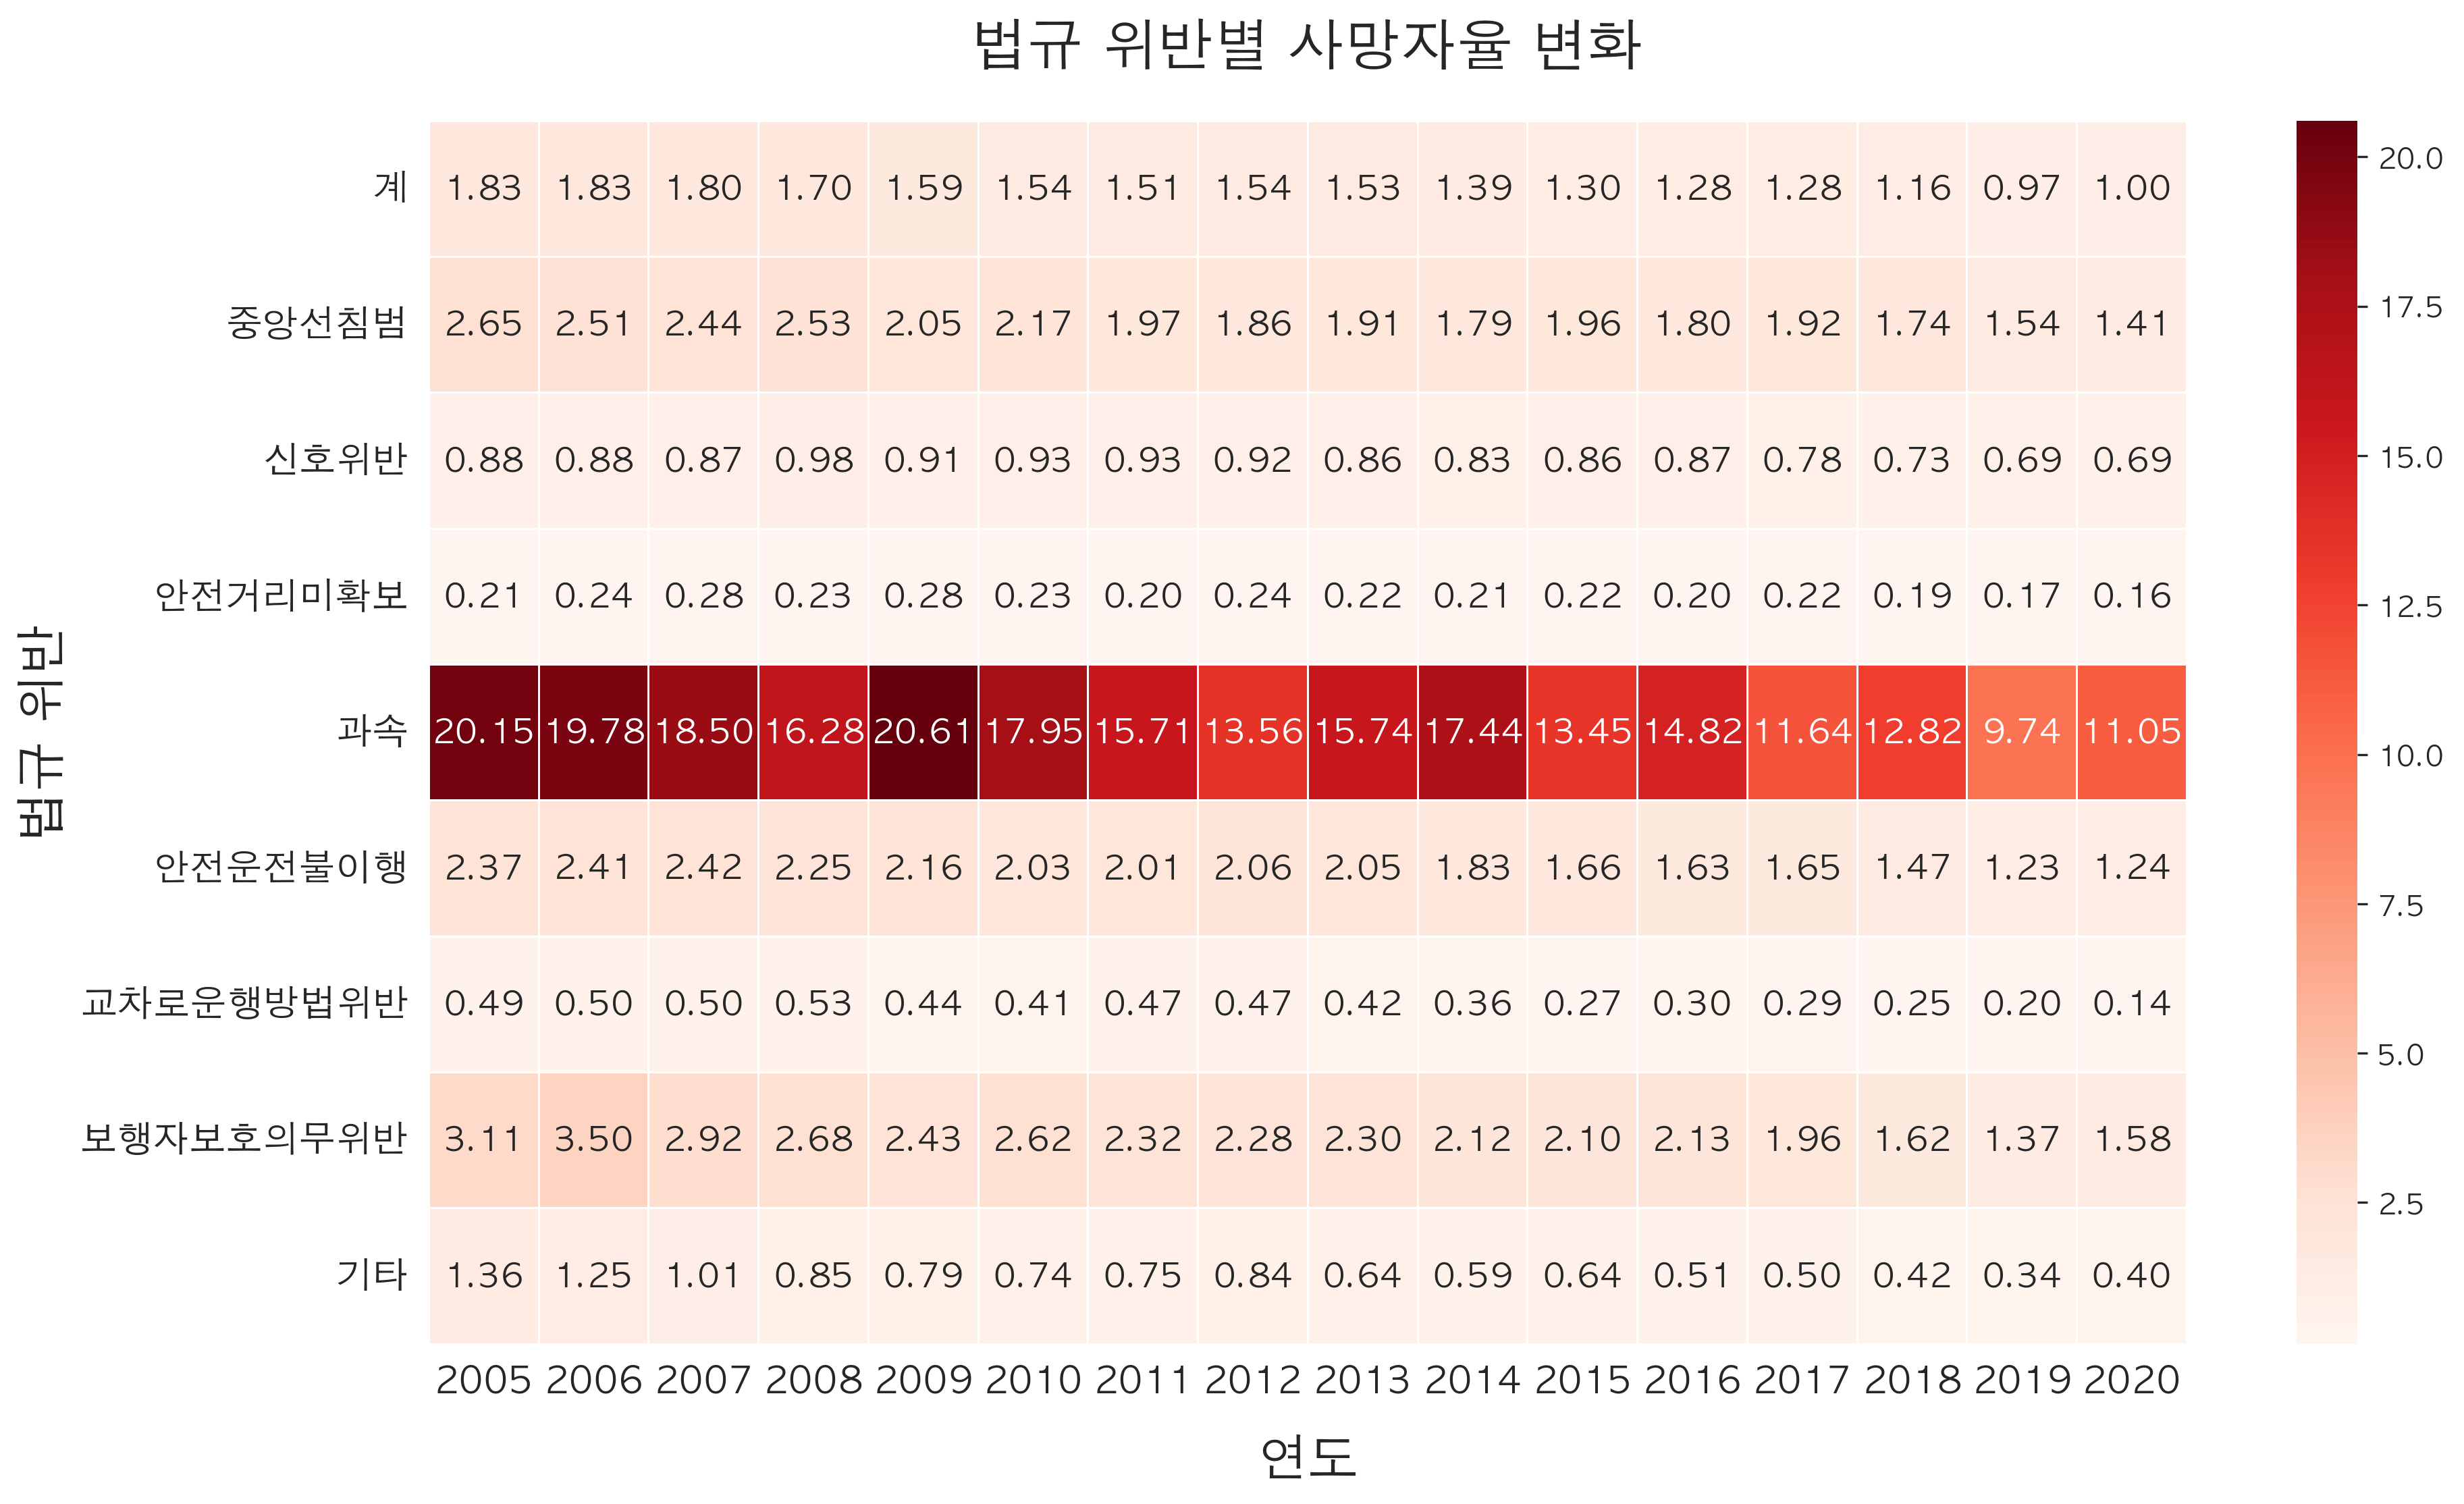

In [55]:
plt.figure(figsize=(14, 8), dpi=300)
cmap = sns.color_palette('coolwarm', as_cmap=True)

sns.heatmap(df_dead_visual.T, annot=True, cmap='Reds', linewidths=.7, fmt= '.2f', annot_kws={"size":12})
plt.title('법규 위반별 사망자율 변화', fontsize=20, pad=20)
plt.ylabel('법규 위반', fontsize=18)
plt.xlabel('연도', fontsize=18, labelpad=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('법규위반별 사망자율 변화.jpg')
plt.show()

각 법규위반별 사망자율
발생 사고 별 사망자가 얼마나 발생하는지 %로 나타내는 것


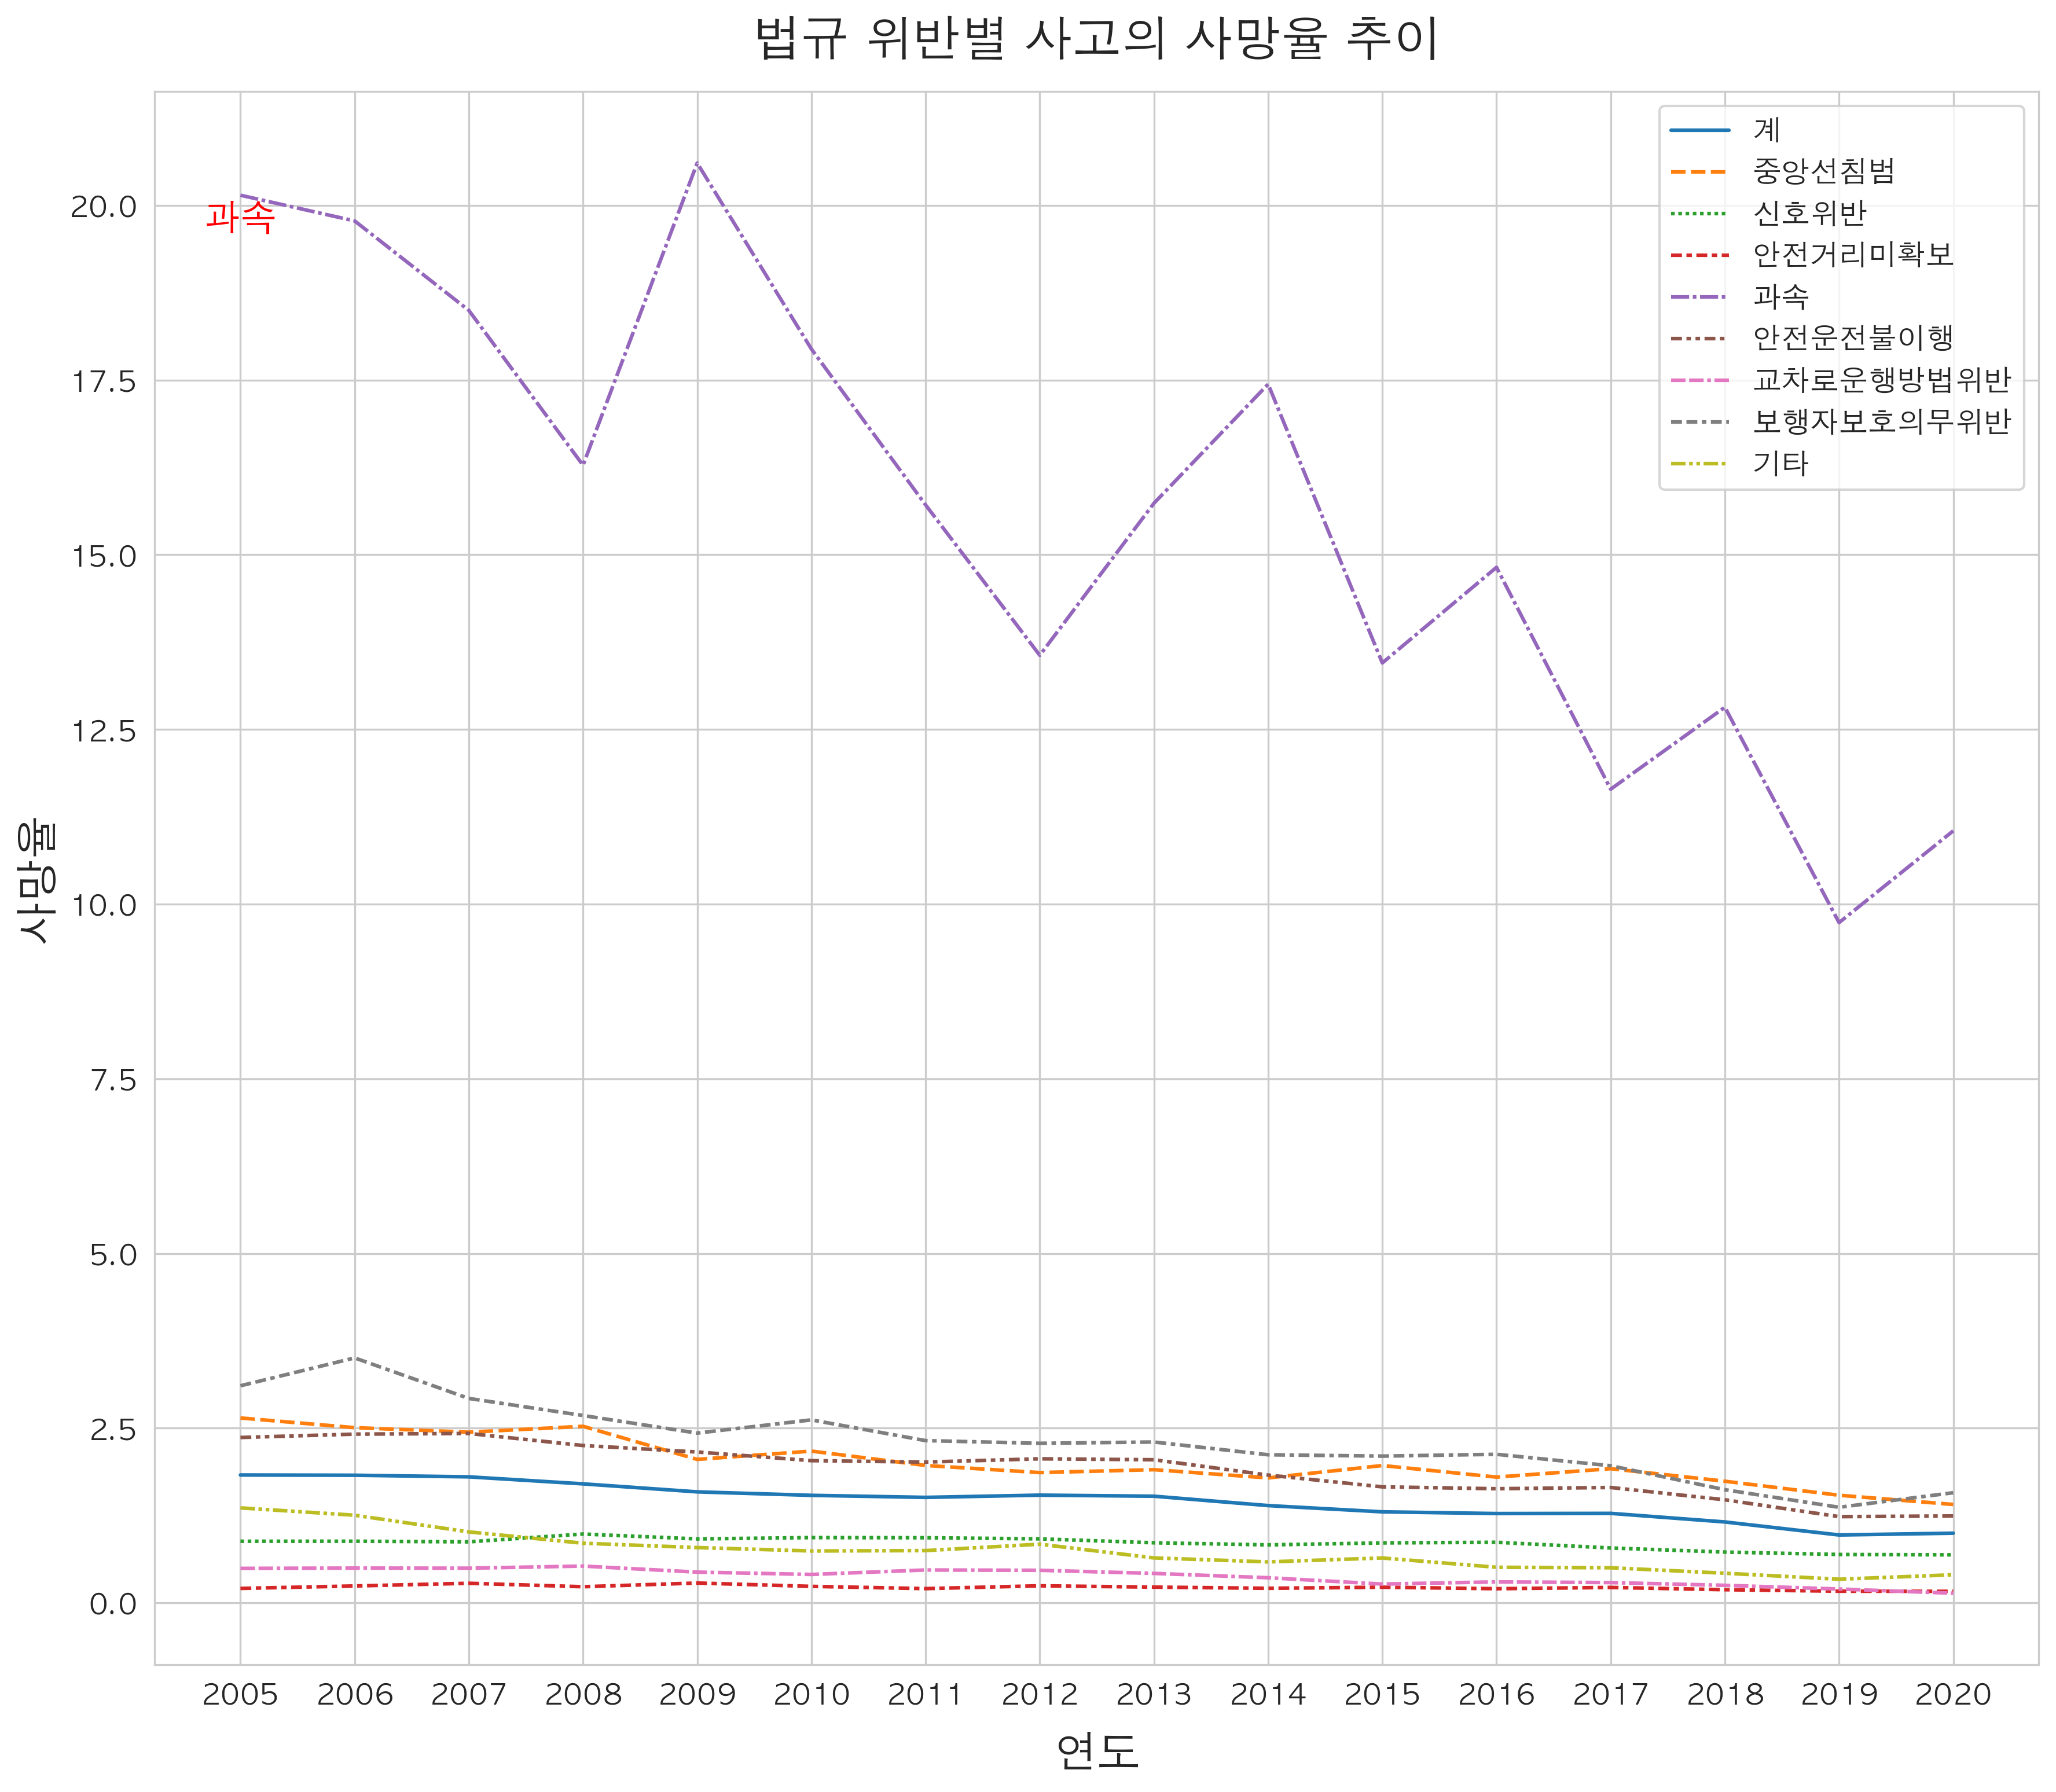

In [56]:
plt.figure(figsize=(14, 12),dpi=300)
cmap = sns.color_palette('coolwarm', as_cmap=True)
sns.lineplot(data=df_dead_visual)
plt.title('법규 위반별 사고의 사망율 추이', fontsize=20, pad=15)
plt.xlabel('연도', fontsize=18, labelpad=10)
plt.ylabel('사망율', fontsize=18)
plt.xticks(df_dead_visual.index, fontsize=12)
plt.yticks(np.arange(0, 22.5, 2.5), fontsize=12)
plt.legend(prop={'size': 12})
for col in range(len(df_dead_visual.columns)):
    if df_dead_visual.columns[col] == '과속':
        plt.text('2005', df_dead_visual.iloc[0, col]-0.5, df_dead_visual.columns[col], horizontalalignment='center', fontsize=15, color='red')
plt.savefig('법규위반별 사고의 사망율 추이.jpg')
plt.show()

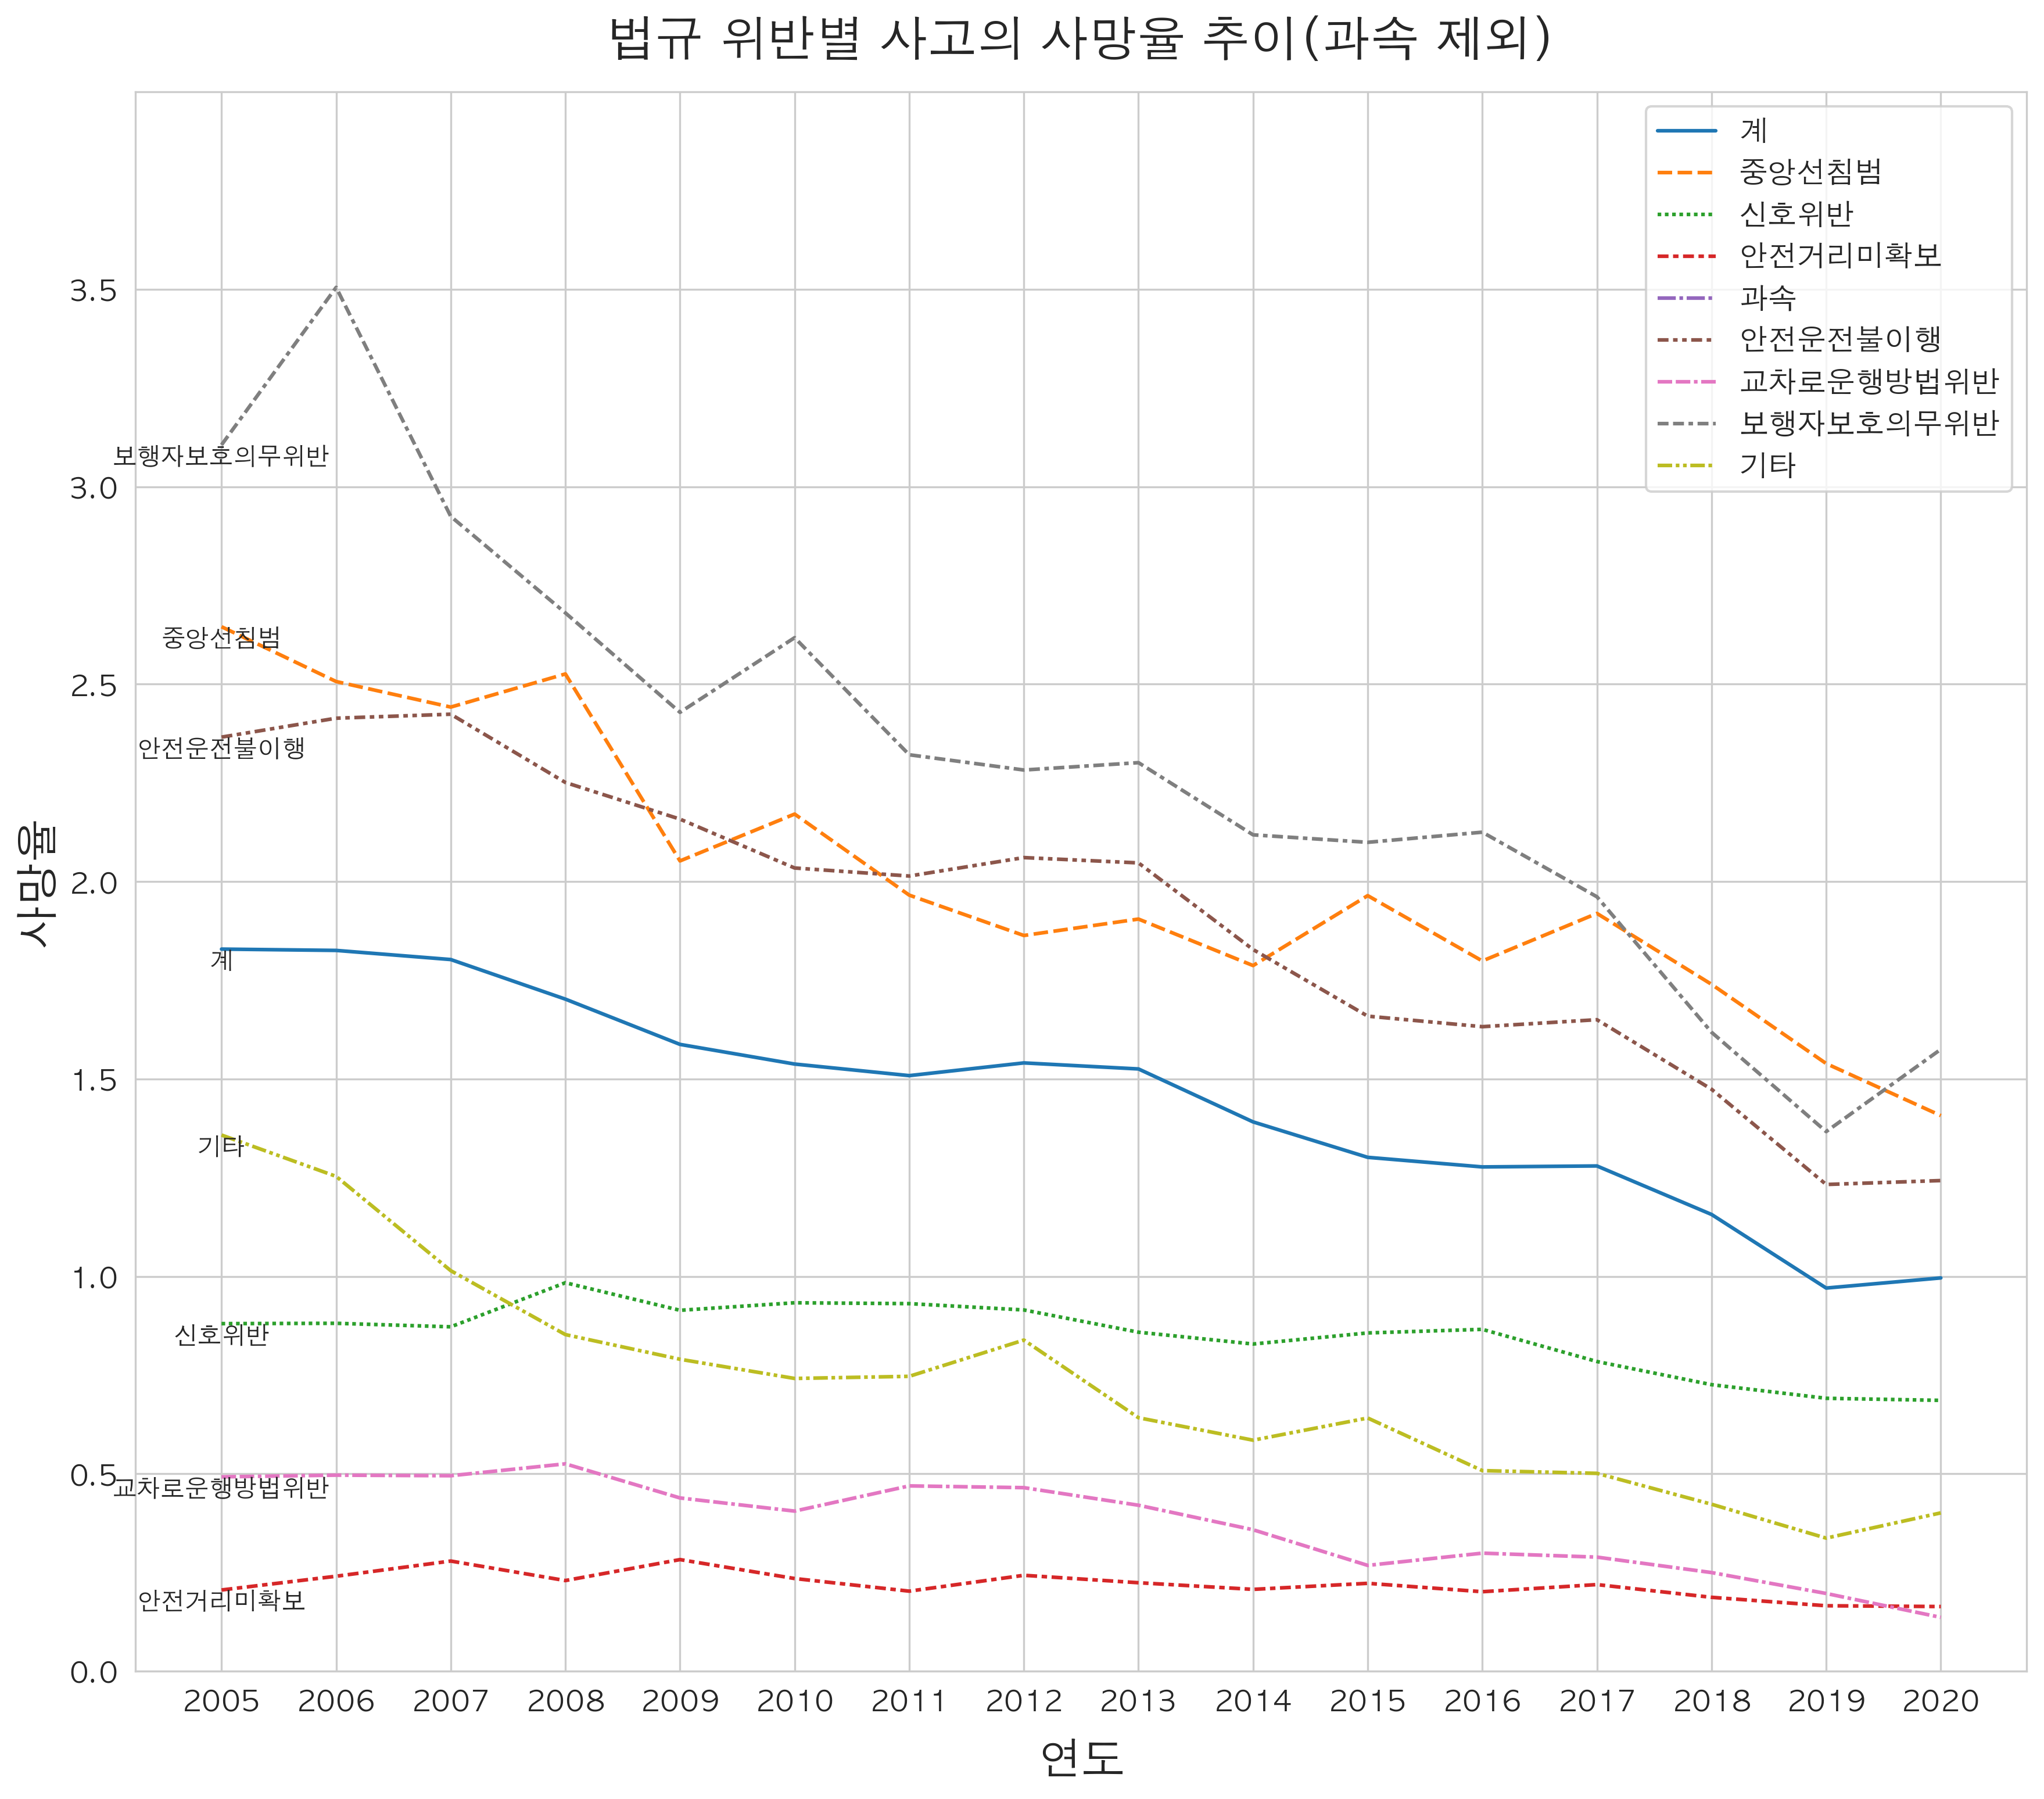

In [57]:
plt.figure(figsize=(14, 12), dpi=300)
cmap = sns.color_palette('coolwarm', as_cmap=True)
sns.lineplot(data=df_dead_visual)
plt.title('법규 위반별 사고의 사망율 추이(과속 제외)', fontsize=20, pad=15)
plt.xlabel('연도', fontsize=18, labelpad=10)
plt.ylabel('사망율', fontsize=18)
plt.xticks(df_dead_visual.index, fontsize=12)
plt.yticks(np.arange(0, 4, 0.5), fontsize=12)
plt.legend(prop={'size': 12})

# 반복문으로 line 시작점에 범례 적어주기
for col in range(len(df_dead_visual.columns)):
    if df_dead_visual.columns[col] != '과속':
        plt.text('2005', df_dead_visual.iloc[0, col]-0.05, df_dead_visual.columns[col], horizontalalignment='center', fontsize=10)
plt.ylim(0, 4)
plt.savefig('법규 위반별 사고의 사망율 추이(과속 제외).jpg')
plt.show()

In [58]:
df_dead_visual

법규위반,계,중앙선침범,신호위반,안전거리미확보,과속,안전운전불이행,교차로운행방법위반,보행자보호의무위반,기타
2005,1.828983,2.645430,0.880447,0.205858,20.146520,2.365903,0.492401,3.106021,1.358113
2006,1.825679,2.506657,0.881259,0.240677,19.778870,2.413804,0.496672,3.504947,1.253346
2007,1.802544,2.441945,0.872366,0.279131,18.498368,2.423907,0.495214,2.924861,1.014534
2008,1.702278,2.525877,0.983999,0.229742,16.281896,2.251024,0.525360,2.680480,0.852674
2009,1.587651,2.052358,0.914190,0.282810,20.606827,2.158182,0.438923,2.428676,0.790208
2010,1.537868,2.170979,0.933257,0.234860,17.945384,2.034430,0.405627,2.617727,0.741588
2011,1.508568,1.965685,0.931090,0.202880,15.714286,2.014053,0.469484,2.321188,0.746950
2012,1.540761,1.863484,0.915100,0.243041,13.561470,2.060780,0.465019,2.282566,0.838833
2013,1.525451,1.905062,0.858723,0.224215,15.737705,2.047312,0.420496,2.301198,0.642116
2014,1.391344,1.787289,0.828813,0.207407,17.441860,1.827920,0.358376,2.118372,0.585217


### 분석결과
- 전체 사망자율 및 각 법규위반별 사망자율은 지속적인 감소세를 띄고 있으나, 과속은 들쑥날쑥한 모습을 보이며, 안전거리 미확보와 신호위반은 감소세가 거의 없다.
- 과속의 경우 2009년부터 감소세가 강한데, 어떠한 사건 또는 법 제정이 있지 않았을 까 생각되나, 구글링으로 발견할 수 없었다.
-

사망자율을 줄이는 다른 요소들도 작용했기에, 사망자율이 감소한 것으로 판단된다.
- 전좌석 안전띠 의무화 -> 2018년 9월부터 시행되었다. 따라서 2019년 사망율 감소에 영향을 미쳤을 것이라고 생각한다.
- 차량 안전 기술의 발전(에어백 등)
- http://www.safetimes.co.kr/news/articleView.html?idxno=64022

In [59]:
df_dead_visual

법규위반,계,중앙선침범,신호위반,안전거리미확보,과속,안전운전불이행,교차로운행방법위반,보행자보호의무위반,기타
2005,1.828983,2.645430,0.880447,0.205858,20.146520,2.365903,0.492401,3.106021,1.358113
2006,1.825679,2.506657,0.881259,0.240677,19.778870,2.413804,0.496672,3.504947,1.253346
2007,1.802544,2.441945,0.872366,0.279131,18.498368,2.423907,0.495214,2.924861,1.014534
2008,1.702278,2.525877,0.983999,0.229742,16.281896,2.251024,0.525360,2.680480,0.852674
2009,1.587651,2.052358,0.914190,0.282810,20.606827,2.158182,0.438923,2.428676,0.790208
2010,1.537868,2.170979,0.933257,0.234860,17.945384,2.034430,0.405627,2.617727,0.741588
2011,1.508568,1.965685,0.931090,0.202880,15.714286,2.014053,0.469484,2.321188,0.746950
2012,1.540761,1.863484,0.915100,0.243041,13.561470,2.060780,0.465019,2.282566,0.838833
2013,1.525451,1.905062,0.858723,0.224215,15.737705,2.047312,0.420496,2.301198,0.642116
2014,1.391344,1.787289,0.828813,0.207407,17.441860,1.827920,0.358376,2.118372,0.585217


# 법규위반별 발생교통사고 건수 추이

법규위반별 발생 교통사고의 추이를 비교하기 위함

In [60]:
df_acc_sum = pd.DataFrame()
df_acc_sum['법규위반'] = read_2005['법규위반']
for year in range(2005, 2021):
    df_acc_sum['{}'.format(year)] = globals()['read_{}'.format(year)]['사고건수(건)']

In [61]:
df_acc_sum

,법규위반,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,계,214171,213745,211662,215822,231990,226878,221711,223656,215354,223552,232035,220917,216335,217148,229600,209654
1,중앙선침범,14616,14507,14262,13653,14327,14071,12931,13018,12324,12092,11998,10712,10184,9559,9344,8364
2,신호위반,23270,25167,25624,26436,27582,25963,24504,25307,24425,25702,26511,24408,24358,24725,27921,24512
3,안전거리미확보,21021,21533,21698,21984,24554,23126,22315,22275,20106,20678,21708,20660,20053,20453,22473,21469
4,과속,444,431,493,411,422,403,403,377,427,515,593,663,839,950,1124,1241
5,안전운전불이행,121532,118329,115976,118791,126340,125082,123744,125391,121402,126329,130551,124399,121322,121797,126006,116272
6,교차로운행방법위반,17784,17444,16268,15617,17145,16206,15172,14721,14407,14341,14671,14602,14229,14064,15372,14079
7,보행자보호의무위반,5364,5527,5501,5641,6343,6542,6890,7106,6816,7231,7582,7808,7516,7819,8055,6166
8,기타,10140,10807,11840,13289,15277,15485,15752,15461,15447,16664,18421,17665,17834,17781,19305,17551


In [62]:
# 시각화를 위해 데이터 형을 정수형으로 전환
df_acc_sum = df_acc_sum.set_index('법규위반').astype('int').T
df_acc_sum.dtypes

법규위반
계            int64
중앙선침범        int64
신호위반         int64
안전거리미확보      int64
과속           int64
안전운전불이행      int64
교차로운행방법위반    int64
보행자보호의무위반    int64
기타           int64
dtype: object

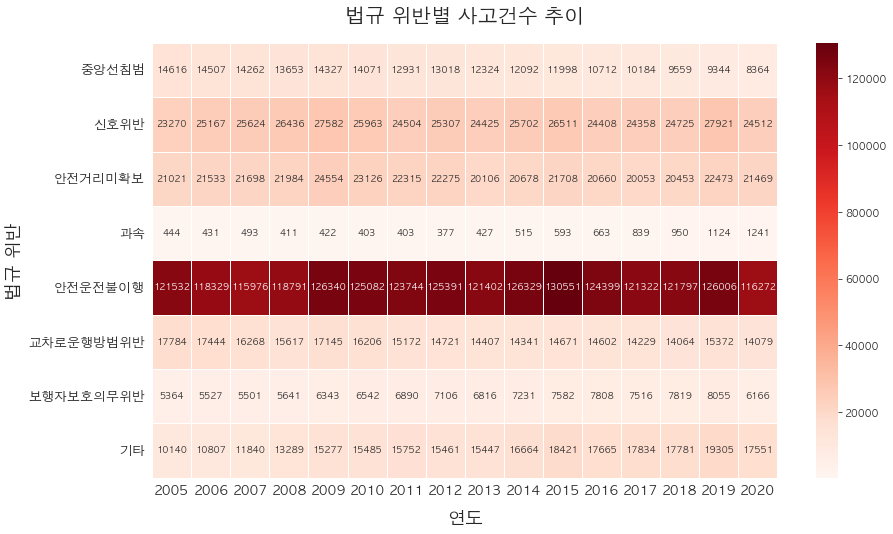

In [63]:
plt.figure(figsize=(14, 8))
cmap = sns.color_palette('coolwarm', as_cmap=True)

sns.heatmap(df_acc_sum.drop('계', axis=1).T, annot=True, cmap='Reds', linewidths=.7, fmt='d', annot_kws={"size":9})
plt.title('법규 위반별 사고건수 추이', fontsize=20, pad=20)
plt.ylabel('법규 위반', fontsize=18)
plt.xlabel('연도', fontsize=18, labelpad=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [64]:
df_acc_sum.index = df_acc_sum.index.astype('int')

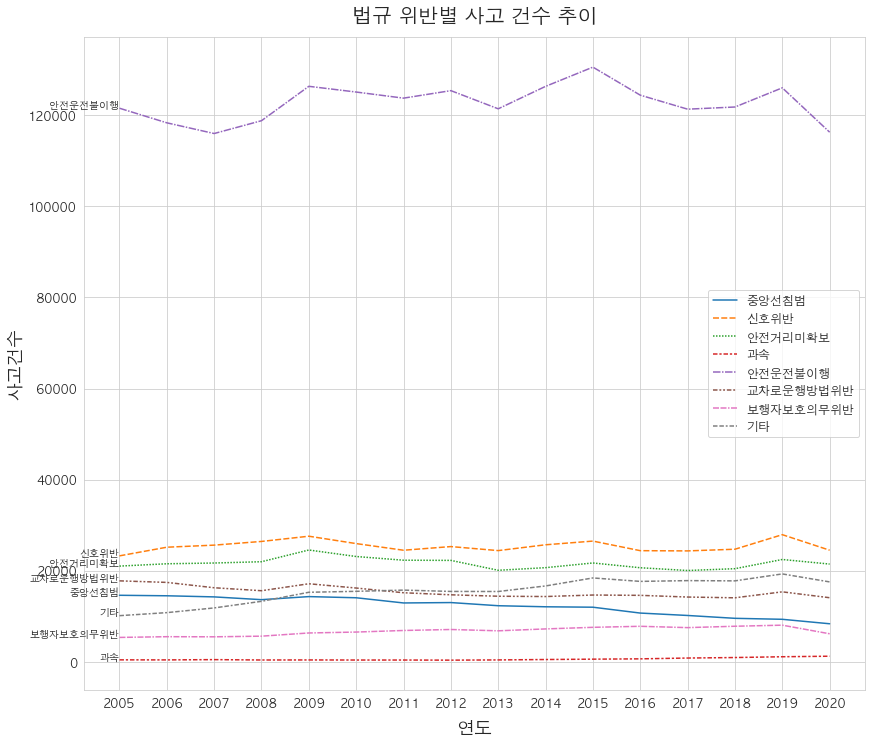

In [65]:
plt.figure(figsize=(14, 12))
sns.lineplot(data=df_acc_sum.drop('계', axis=1))
plt.title('법규 위반별 사고 건수 추이', fontsize=20, pad=15)
plt.xlabel('연도', fontsize=18, labelpad=10)
plt.ylabel('사고건수', fontsize=18)
plt.xticks(df_acc_sum.drop('계', axis=1).index, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(prop={'size': 12})
for col in range(1, len(df_acc_sum.columns)):
    plt.text(2005, df_acc_sum.iloc[0, col]-0.5, df_acc_sum.columns[col], horizontalalignment='right')

plt.show()

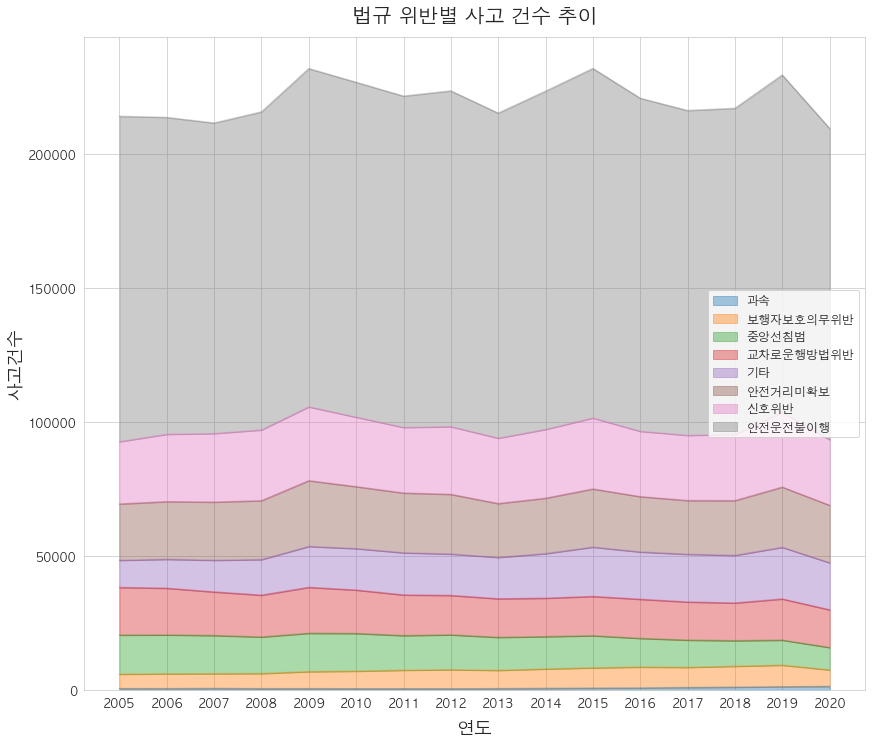

In [66]:
# 전체를 보여주는 면적그래프
# 깔끔하게 보이기 위해 sort_values로 면적 순서대로 그림
for idx in df_acc_sum.index:
    df_acc_sum.sort_values(by=idx, axis=1, inplace=True)

df_acc_sum.drop('계', axis=1).plot(kind = 'area', stacked = True, alpha = 0.4, figsize = (14, 12))
plt.title('법규 위반별 사고 건수 추이', fontsize=20, pad=15)
plt.xlabel('연도', fontsize=18, labelpad=10)
plt.ylabel('사고건수', fontsize=18)
plt.xticks(df_acc_sum.drop('계', axis=1).index, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(prop={'size': 12})

plt.show()

안전운전 불이행이 가장 건수가 많으나, 안전운전 의무 조항 자체가 13개나 되고, 다른 위반에 비해 다소 가볍기 때문에 자주 발생하는 것으로 판단됨.

-> 이는 기본적인 안전운전 의무조차 지켜지지 않고 있다는 것으로 볼 수 있음.
-> 따라서, 교통사고 발생 건수를 줄이기 위해서는, 면허시험 시 안전운전의무 교육, 암행순찰차를 이용한 단속 등 운전자의 주의를 경각시키고 안전운전 의무 위반으로 발생하는 사고를 예방해야 한다. 특히, 운전 중 휴대전화 사용 등을 엄격하게 제한할 필요가 있다.
->
- 과속은 2005년에 비해 약 3배가량 사고 건수가 증가했다.

### 분석결과
차대차 사고의 예방을 위해서는 과속단속,